In [39]:
### mini project Breast Cancer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Module2_IntroToML/MiniProjects/BreastCancer/data.csv")
df.dropna()

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [48]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [50]:
## Feature selection  #removing correlated features
       ## Help from: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,NaN,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,...,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866,NaN
radius_mean,NaN,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,NaN,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,NaN,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,NaN,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [51]:
# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df.drop(to_drop,axis=1,inplace=True) ## Now 10 features remaining
to_drop

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']

In [52]:
# Remove id and unnamed:32 
df.dropna()
df1 = df.iloc[:, 1:12]
df1

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.2560,0.010300,0.01114,0.2060
565,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,2.4630,0.005769,0.01898,0.2572
566,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,1.0750,0.005903,0.01318,0.2218
567,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016,1.5950,0.006522,0.02324,0.4087


In [77]:
###Preprocessing; 
    ## Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1.iloc[:,1:13] = scaler.fit_transform(df1.iloc[:,1:13])
df1

    ## Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['diagnosis']= encoder.fit_transform(df1['diagnosis'])

df1

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.120469,0.159296,0.311645,0.598462
1,1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.082589,0.119387,0.084539,0.233590
2,1,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.094303,0.150831,0.205690,0.403706
3,1,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.175875,0.251453,0.728148,1.000000
4,1,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.093065,0.332359,0.136179,0.157500
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.197976,0.291906,0.045843,0.097575
565,1,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.464728,0.137879,0.156160,0.198502
566,1,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.157974,0.142435,0.074548,0.128721
567,1,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.272896,0.163477,0.216103,0.497142


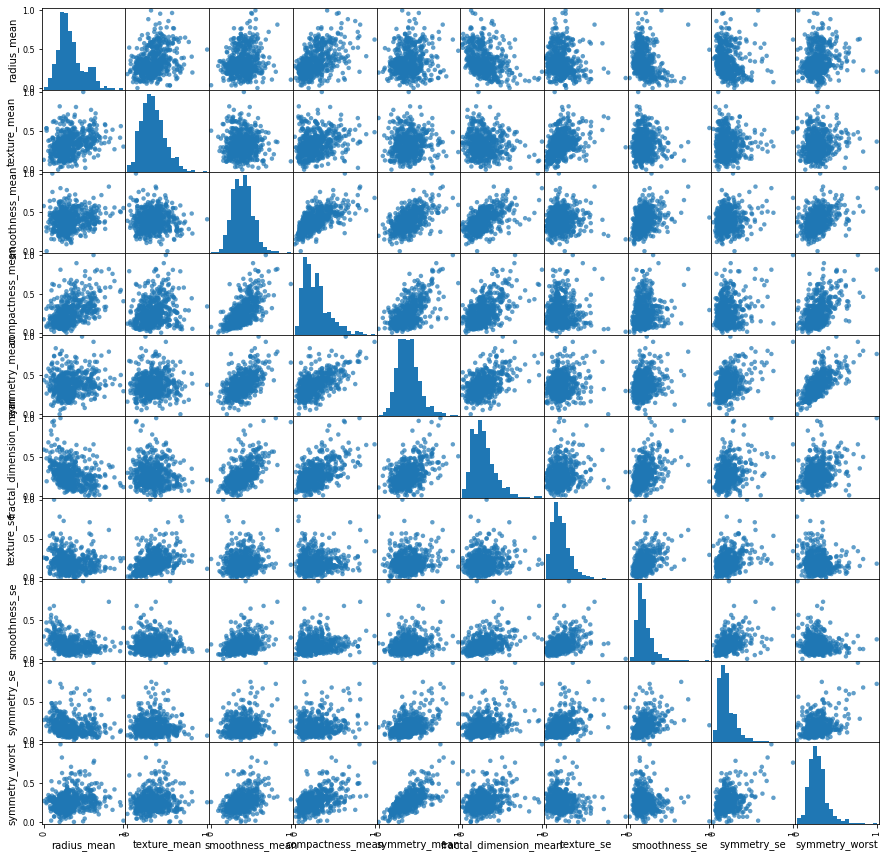

In [85]:
###Step5  Visualisation
    
import seaborn as sns
import matplotlib.pyplot as plt

## Pair plots 
g = pd.plotting.scatter_matrix(df1.iloc[:, 1:12], figsize=(15,15), 
                               marker = 'o', hist_kwds = {'bins': 20}, s = 20, alpha = 0.7)

plt.show()


[Text(0, 0, 'radius_mean'),
 Text(0, 1, 'texture_mean'),
 Text(0, 2, 'smoothness_mean'),
 Text(0, 3, 'compactness_mean'),
 Text(0, 4, 'symmetry_mean'),
 Text(0, 5, 'fractal_dimension_mean'),
 Text(0, 6, 'texture_se'),
 Text(0, 7, 'smoothness_se'),
 Text(0, 8, 'symmetry_se'),
 Text(0, 9, 'symmetry_worst')]

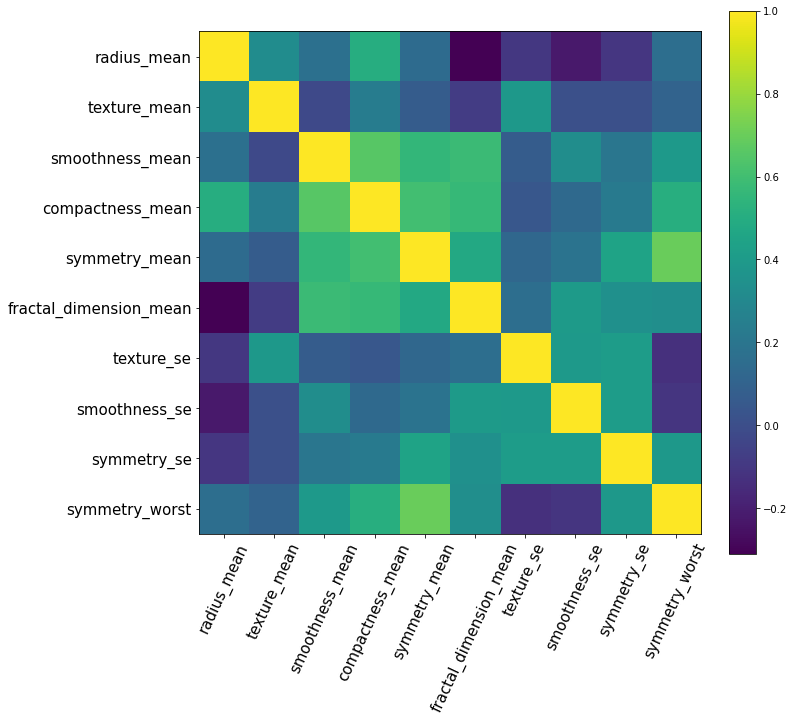

In [103]:
### plot corelation matrix

pear_corr=df1.iloc[:, 1:12].corr(method='pearson')
pear_corr

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
labels = pear_corr.columns.tolist()

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(pear_corr.columns, rotation=65, fontsize=15)
ax.set_yticklabels(pear_corr.columns, rotation=0, fontsize=15)




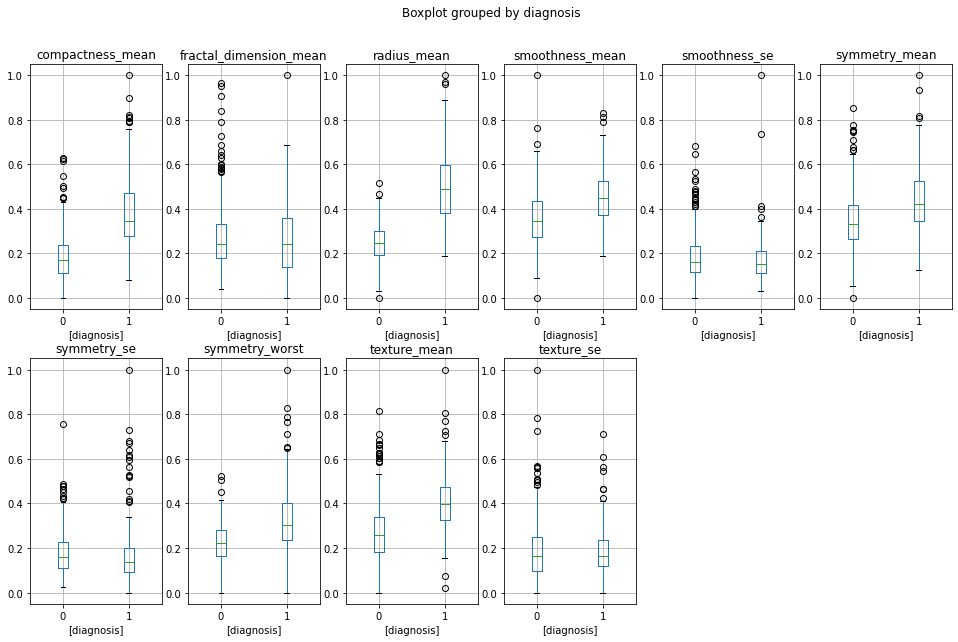

In [152]:
## box plot
#df2 = pd.DataFrame({'variable': np.tile(df1.columns, len(df1)), 'diagnosis': df1['diagnosis'], 'value': df1.iloc[:,1:12].values.ravel()})
df2 = pd.melt(df1, id_vars= 'diagnosis', value_vars =df1.iloc[:,1:11])


from matplotlib import pyplot as plt

#sns.catplot(kind = 'box', col='variable', x= 'diagnosis', y='value', hue='diagnosis', data=df2, sharey=False, height=4)
#fig, axes = plt.subplots(1,2,3,4,5,6,7,8,9,10,11, figsize=(8, 6))
#df2.groupby('variable').boxplot(by='diagnosis', ax=axes)

#df_plots.groupby('variable').boxplot(by='diagnosis', figsize=(8, 6), layout=(1, 2), sharey=False)
axes = df2.groupby('variable').boxplot(by='diagnosis', figsize=(16, 10),
                                         layout=(2,6), sharey=False)
plt.show()

In [147]:
df2

,diagnosis,variable,value
0,1,radius_mean,0.521037
1,1,radius_mean,0.643144
2,1,radius_mean,0.601496
3,1,radius_mean,0.210090
4,1,radius_mean,0.629893
...,...,...,...
5685,1,symmetry_worst,0.097575
5686,1,symmetry_worst,0.198502
5687,1,symmetry_worst,0.128721
5688,1,symmetry_worst,0.497142


In [145]:
np.tile(df1.iloc[:,1:11].columns, len(df1))

array(['radius_mean', 'texture_mean', 'smoothness_mean', ...,
       'smoothness_se', 'symmetry_se', 'symmetry_worst'], dtype=object)